<h2>Machine Learning Model for Predicting Cars' Fuel Consumption</h2>

<h3><b>Abstract:</b></h3><br>
This Jupiter Notebook project represents a Machine Learning Multiple Linear Regression model that was developed by using the Python programming language. The developed model enables to predict the cars' fuel consumption in function of factors such as age of cars, cars' weight, number of cylinders in vehicles' engines, horsepower and others. A well-known fuel consumption <a href='https://archive.ics.uci.edu/ml/datasets/Auto+MPG'>dataset</a> was used for the purposes of the project. The dataset was subsequently split in two datasets - train and test datasets. The train dataset was used to train the regression model and the test dataset was used to predict the fuel consumption with the fitted model. The value of the coefficient of determination R-squared = 0.92 shows that about 92% of the variation in the values of the dependent variable 'fuel consumption' can be explained with the influence of the independent factors in the model and the rest 8% depend on other factors which the model does not take into account.

<p><b>Author: </b>Stavri Dimitrov, PhD</p>
<b>Last Updated: </b>19 August 2020</p>

<h2>Table of Contents</h2>

<a>1. Libraries and Modules</a><br>
<a>2. Data Import</a><br>
<a>3. Data Wrangling and Cleansing</a><br>
<a>4. Exploratory Data Analysis and Data Visualization</a><br>
<a>5. Model Development, Training and Prediction</a><br>
<a style="padding-left: 15px;">5.1. Model Training</a><br>
<a style="padding-left: 15px;">5.2. Model Predictions and Evaluation Metrics</a><br>
<a>6. References</a><br>
<a>About the Author</a>


<h2 id='1. Libraries and Modules'>1. Libraries and Modules</h2>

In [1]:
# Import libraries and modules
import pandas as pd
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h2 id='2. Data Import'>2. Data Import</h2>

In [2]:
# Declare column names
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Assign the content of the '.data' file to a new dataframe called df
df = pd.read_fwf('auto-mpg.data', names = col_names)

# Show the first 5 data rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,"""chevy s-10"""


In [4]:
# Show the number of datarows and columns
df.shape

(398, 9)

In [5]:
# Display the data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

<h2 id='3. Data Wrangling and Cleansing'>3. Data Wrangling and Cleansing</h2>

In [6]:
# Calculate and show a descriptive statistics
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<b>Note:</b> Statistics for the 'horsepower' column is not showing as it si an object (string) value column!

In [7]:
# Check for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [8]:
# Replace the missing values in the 'horsepower' column
df['horsepower'] = df['horsepower'].replace('?', '0')

In [9]:
# Cast the 'horsepower' column from an object (string) to a numeric (float64)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Display the data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [10]:
# Convert the fuel consumption measurement unit from US miles per galon(mpg) to litres per 100km(L/100km)
fuel_conversion_rate = 235.2146
df['mpg'] = round(fuel_conversion_rate/df['mpg'],1)

# Rename the 'mpg' column to 'fuel consumption'
df.rename(columns = {'mpg':'fuel_consumption'}, inplace = True)

# Show the first 5 data rows
df.head()

,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,13.1,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.7,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,13.1,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,14.7,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,13.8,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [11]:
# Count and display in a table the distribution of the cars names by a unique name
df_car_names = df['car_name'].value_counts().to_frame()
df_car_names

,car_name
"""ford pinto""",6
"""ford maverick""",5
"""toyota corolla""",5
"""amc matador""",5
"""chevrolet impala""",4
...,...
"""dodge d200""",1
"""chevrolet malibu classic (sw)""",1
"""toyota corolla tercel""",1
"""toyota tercel""",1


In [12]:
# Assign to the df_cylinders dataframe and show the distribution of the cars grouped by an engine type (number of cylinders)
df_cylinders = df['cylinders'].value_counts().to_frame()
df_cylinders

,cylinders
4,204
8,103
6,84
3,4
5,3


In [13]:
# Create and display in a table a new dataframe(df_horsepower) from existing one(df) having 2 columns(cylinders and horsepower)
df_horsepower = df[['cylinders', 'horsepower']].copy()
df_horsepower

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
...,...,...
393,4,86.0
394,4,52.0
395,4,84.0
396,4,79.0


In [14]:
# Calculate and show the average horsepower of cars by the number of cylinders (3, 4, 5, 6 and 8).
df_av_hp = df_horsepower.groupby(['cylinders']).mean()
df_av_hp

,horsepower
cylinders,
3,99.250000
4,76.362745
5,82.333333
6,100.297619
8,158.300971


In [15]:
# Assign to a separate variable the calculated average HP value by engine type (number of cylinders)
hp_av_3 = round(df_av_hp.iloc[0,0])
hp_av_4 = round(df_av_hp.iloc[1,0])
hp_av_5 = round(df_av_hp.iloc[2,0])
hp_av_6 = round(df_av_hp.iloc[3,0])
hp_av_8 = round(df_av_hp.iloc[4,0])

# Print the averaged HP values
print('-----------------------------------------------------------------')
print('average horse power for 3-cylinder engines =', hp_av_3)
print('average horse power for 4-cylinder engines =', hp_av_4)
print('average horse power for 5-cylinder engines =', hp_av_5)
print('average horse power for 6-cylinder engines =', hp_av_6)
print('average horse power for 8-cylinder engines =', hp_av_8)
print('-----------------------------------------------------------------')

# Assign to a variable and print the number of the datarows in the df dataframe
counter = df.shape[0]
#print('counter = ', counter)

# Check for 0 values by engine type in the horsepower column and assign the calculated average values
for i in range(counter):
    if df.loc[i, 'cylinders'] == 3 and df.loc[i, 'horsepower'] == 0:                                   
        df.loc[i, 'horsepower'] = hp_av_3
        #print('Row number =', i, 'cylinders =', df.loc[i, 'cylinders'], df.loc[i, 'horsepower'])
    elif df.loc[i, 'cylinders'] == 4 and df.loc[i, 'horsepower'] == 0:                                 
        df.loc[i, 'horsepower'] = hp_av_4
        #print('Row number =', i, 'cylinders =', df.loc[i, 'cylinders'], df.loc[i, 'horsepower'])
    elif df.loc[i, 'cylinders'] == 5 and df.loc[i, 'horsepower'] == 0:                                   
        df.loc[i, 'horsepower'] = hp_av_5
        #print('Row number =', i, 'cylinders =', df.loc[i, 'cylinders'], df.loc[i, 'horsepower'])        
    elif df.loc[i, 'cylinders'] == 6 and df.loc[i, 'horsepower'] == 0:                           
        df.loc[i, 'horsepower'] = hp_av_6
        #print('Row number =', i, 'cylinders =', df.loc[i, 'cylinders'], df.loc[i, 'horsepower'])
    elif df.loc[i, 'cylinders'] == 8 and df.loc[i, 'horsepower'] == 0:                           
        df.loc[i, 'horsepower'] = hp_av_8
        #print('Row number =', i, 'cylinders =', df.loc[i, 'cylinders'], df.loc[i, 'horsepower'])
    else:
       pass
       #print('Row number =', i, 'cylinders =', df.loc[i, 'cylinders'], df.loc[i, 'horsepower'])

-----------------------------------------------------------------
average horse power for 3-cylinder engines = 99.0
average horse power for 4-cylinder engines = 76.0
average horse power for 5-cylinder engines = 82.0
average horse power for 6-cylinder engines = 100.0
average horse power for 8-cylinder engines = 158.0
-----------------------------------------------------------------


In [16]:
# Declare variables for the full current date as well as for the current year only
current_full_date = datetime.datetime.now()
current_year = current_full_date.year
# Print the current year
#print(current_year)

# Represent the year from a 2-digit number to a 4-digit number (e.g. from 70 to 1970) to calculate the age of the cars.
# The below formula is only valid for cars produced in 20th century (see the original dataset)!
df['model_year'] = df['model_year'] + 1900

# Rename the 'model_year' column to a 'car_age' column and calculate the cars' age.
df.rename(columns = {'model_year':'car_age'}, inplace = True)
df['car_age'] = current_year - df['car_age']

# Display the first 5 datarows including the calculated car age
df.head()

,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,car_age,origin,car_name
0,13.1,8,307.0,130.0,3504.0,12.0,50,1,"""chevrolet chevelle malibu"""
1,15.7,8,350.0,165.0,3693.0,11.5,50,1,"""buick skylark 320"""
2,13.1,8,318.0,150.0,3436.0,11.0,50,1,"""plymouth satellite"""
3,14.7,8,304.0,150.0,3433.0,12.0,50,1,"""amc rebel sst"""
4,13.8,8,302.0,140.0,3449.0,10.5,50,1,"""ford torino"""


In [17]:
# Convert the cars' weight from pounds[lb] to kilograms[kg]
weight_conversion_rate = 0.4536
df['weight'] = round(df['weight']*weight_conversion_rate)

In [18]:
# Drop the 'origin' and 'car_name' columns from the df dataframe
df.drop(columns = ['origin', 'car_name'], axis = 1, inplace = True)

# Display the frist 5 data rows
df.head()

,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,car_age
0,13.1,8,307.0,130.0,1589.0,12.0,50
1,15.7,8,350.0,165.0,1675.0,11.5,50
2,13.1,8,318.0,150.0,1559.0,11.0,50
3,14.7,8,304.0,150.0,1557.0,12.0,50
4,13.8,8,302.0,140.0,1564.0,10.5,50


In [19]:
# Save to a '.csv' file the working df dataframe
df.to_csv('df_hp_missing_values_fixed.csv', sep = ',')

<h2 id='4. Exploratory Data Analysis and Data Visualization'>4. Exploratory Data Analysis and Data Visualization</h2>

In [20]:
# Calculate and print descriptive statistics to see the 'horsepower', 'weight' and 'car_age' values.
df.describe()

,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,car_age
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,11.212814,5.454774,193.425879,104.100503,1347.386935,15.568090,43.989950
std,3.905304,1.701004,104.269838,38.331445,384.131499,2.757689,3.697627
min,5.000000,3.000000,68.000000,46.000000,732.000000,8.000000,38.000000
25%,8.100000,4.000000,104.250000,76.000000,1008.500000,13.825000,41.000000
50%,10.200000,4.000000,148.500000,92.000000,1271.500000,15.500000,44.000000
75%,13.400000,8.000000,262.000000,125.000000,1636.500000,17.175000,47.000000
max,26.100000,8.000000,455.000000,230.000000,2332.000000,24.800000,50.000000


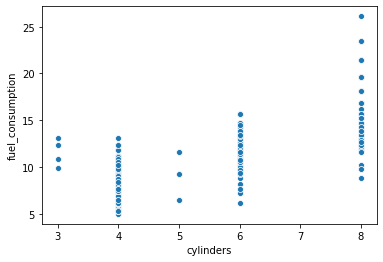

In [21]:
# Create a list variable containing the columns name excluding the removed "origin" and "car_name" columns
col_names_corr = ['fuel_consumption', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'car_age']

# Dsiplay scatter plot diagram for the feature variable 'cylinders' and the label variable 'fuel_consumption'
sns.scatterplot(x = 'cylinders', y = 'fuel_consumption', data = df)

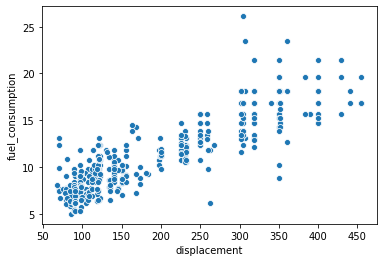

In [22]:
# Display scatter plot diagram for the feature variable 'displacement' and the label variable 'fuel_consumption'
sns.scatterplot(x = 'displacement', y = 'fuel_consumption', data = df)

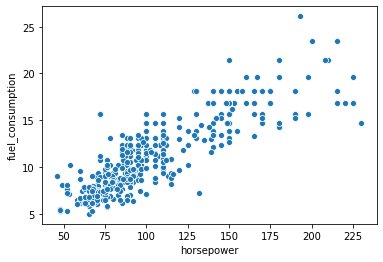

In [23]:
# Display scatter plot diagram for the feature variable 'horsepower' and the label variable 'fuel_consumption'
sns.scatterplot(x = 'horsepower', y = 'fuel_consumption', data = df)

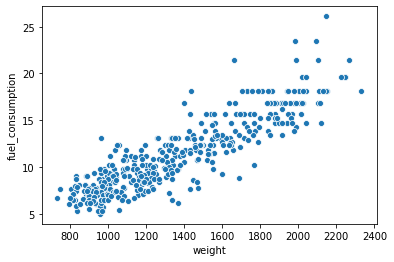

In [24]:
# Display scatter plot diagram for the feature variable 'weight' and the label variable 'fuel_consumption'
sns.scatterplot(x = 'weight', y = 'fuel_consumption', data = df)

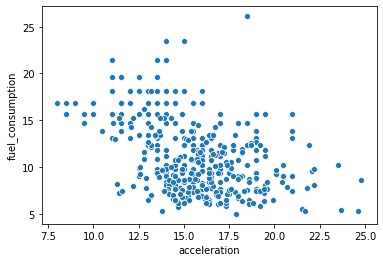

In [25]:
# Display scatter plot diagram for the feature variable 'acceleration' and the label variable 'fuel_consumption'
sns.scatterplot(x = 'acceleration', y = 'fuel_consumption', data = df)

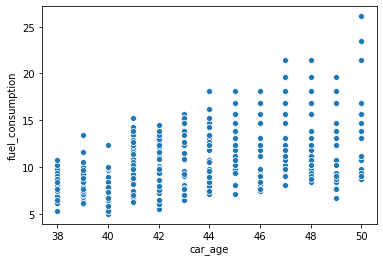

In [26]:
# Display scatter plot diagram for the feature variable 'car_age' and the label variable 'fuel_consumption'
sns.scatterplot(x = 'car_age', y = 'fuel_consumption', data = df)

In [27]:
# Display the correlations table/matrix
df.corr()

,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,car_age
fuel_consumption,1.000000,0.839543,0.866774,0.854501,0.885237,-0.455994,0.557396
cylinders,0.839543,1.000000,0.950721,0.843951,0.895986,-0.505419,0.348746
displacement,0.866774,0.950721,1.000000,0.897598,0.932814,-0.543684,0.370164
horsepower,0.854501,0.843951,0.897598,1.000000,0.863640,-0.688197,0.417129
weight,0.885237,0.895986,0.932814,0.863640,1.000000,-0.417463,0.306540
acceleration,-0.455994,-0.505419,-0.543684,-0.688197,-0.417463,1.000000,-0.288137
car_age,0.557396,0.348746,0.370164,0.417129,0.306540,-0.288137,1.000000


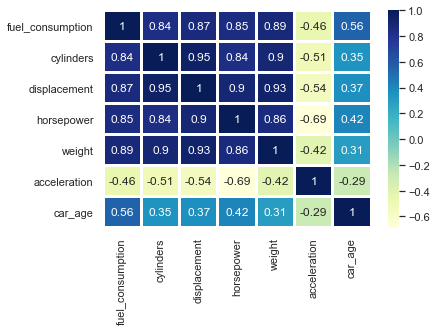

In [28]:
# Assign to a variable, plot on a heatmap and display the correlation matrix
sns.set(style = 'white')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap='YlGnBu', center=None, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=2, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

In [29]:
# Display the correlation between the label 'fuel_consumption' variable and the featured variables sorted in an ascending order.
df.corr()['fuel_consumption'].sort_values(ascending = False)

fuel_consumption    1.000000
weight              0.885237
displacement        0.866774
horsepower          0.854501
cylinders           0.839543
car_age             0.557396
acceleration       -0.455994
Name: fuel_consumption, dtype: float64

<h2 id='5. Model Development, Training and Prediction'>5. Model Development, Training and Prediction</h2>

<h3 id='5.1. Model Training'>5.1. Model Training</h3>

In [30]:
# Create a list variable containing the columns name excluding the label variable 'fuel_consumption' as well as the "origin" and "car_name" columns.
col_names_regr = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'car_age']

X = df[col_names_regr]
Y = df['fuel_consumption']

# Split the data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Print the number of the datarows used to train and test the multiple linear regression model
print("The number of rows in the train dataset are", X_train.shape[0])
print("The number of rows in the test dataset are", X_test.shape[0])

# Train the regression model by using the fit() function
MLR = LinearRegression()
MLR.fit(X_train, Y_train)

The number of rows in the train dataset are 318
The number of rows in the test dataset are 80


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3 id='5.2. Model Predictions and Evaluation Metrics'>5.2. Model Predictions and Evaluation Metrics</h3>

In [31]:
# Make predictions with the fitted model
Y_hat = MLR.predict(X_test)

# Display the value of the coefficient of determiantion(R-squared) calculated with the test dataset
R_squared_test = MLR.score(X_test, Y_test)

# Round the R-squared value
R_squared_test = round(R_squared_test, 3)

# Print the values of the regression coefficients, some predicted values and the R-squared value
print('\nThe intercept value of the multiple linear regression model is b0 =', round(MLR.intercept_,8))
print('\nThe coefficients b1, b2, ..., b11 of the multiple linear regression model of type')
print('\nY_hat = b0 + b1.X1 + b2.X2 + b3.X3 + b4.X4 + b5.X5 + b6.X6 have values: ')
print(MLR.coef_)

print('\nThe Multiple Linear Regression Model is:')
print('fuel_consumption = ')
print('                   -15.51909647')
print('                   +0.30048785.cylinders')
print('                   -0.00453743.displacement')
print('                   +0.02804279.horsepower')
print('                   +0.00586874.weight')
print('                   +0.0878004.acceleration')
print('                   +0.31352031.car_age')

print('\nThe predicted values for cars fuel consumption per 100km are:')
print(Y_hat, sep = '\n')
print('\nThe coefficient of determination R-squared calculated for the test dataset is: ')
print('R-squared_test =', round(R_squared_test,2))


The intercept value of the multiple linear regression model is b0 = -15.51909647

The coefficients b1, b2, ..., b11 of the multiple linear regression model of type

Y_hat = b0 + b1.X1 + b2.X2 + b3.X3 + b4.X4 + b5.X5 + b6.X6 have values: 
[ 0.30048785 -0.00453743  0.02804279  0.00586874  0.0878004   0.31352031]

The Multiple Linear Regression Model is:
fuel_consumption = 
                   -15.51909647
                   +0.30048785.cylinders
                   -0.00453743.displacement
                   +0.02804279.horsepower
                   +0.00586874.weight
                   +0.0878004.acceleration
                   +0.31352031.car_age

The predicted values for cars fuel consumption per 100km are:
[11.55588018  9.90263102 13.63636534 10.37669383 10.89890819 15.76297451
  8.16679508  6.22184777 14.43201505 18.15547474  7.46418658 14.74958926
 12.05089495  9.74300075  5.33351903 11.10418136 18.6002984  12.17744855
 19.41708019  7.03582483 10.23660301  7.34903591 11.72484068 10.

<h2 id='6. References'>6. References</h2>

[1] <a href='https://www.python-course.eu/pandas_replacing_values.php'>Accessing and Changing values of DataFrames</a><br> 
[2] <a href='https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/'>Accessing pandas dataframe columns, rows, and cells</a><br>
[3] <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/'> Auto MPG Data Folder</a><br>
[4] <a href='https://archive.ics.uci.edu/ml/datasets/Auto+MPG'>Auto MPG Data Set</a><br>
[5] <a href='https://www.geeksforgeeks.org/check-multiple-conditions-in-if-statement-python/'>Check multiple conditions in if statement – Python</a><br>
[6] <a href='https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy'>Extracting specific selected columns to new DataFrame as a copy</a><br>
[7] <a href='https://www.datacamp.com/community/tutorials/for-loops-in-python'>For Loops in Python</a><br>
[8] <a href='https://www.thecalculatorsite.com/conversions/fuelconsumption.php'>Fuel Consumption Converter</a><br>
[9] <a href='https://stackoverflow.com/questions/19632728/how-do-i-get-a-python-program-to-do-nothing/19632742'>How do I get a python program to do nothing?</a><br>
[10] <a href='https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe'>How do I get the row count of a pandas DataFrame?</a><br>
[11] <a href='https://towardsdatascience.com/how-to-change-datatypes-in-pandas-in-4-minutes-677addf9a409'>How To Change DataTypes In Pandas in 4 Minutes</a><br>
[12] <a href='https://stackoverflow.com/questions/30071886/how-to-get-current-time-in-python-and-break-up-into-year-month-day-hour-minu'>How to get current time in python and break up into year, month, day, hour, minute?</a><br>
[13] <a href='https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell'>How to make a new line in a jupyter markdown cell</a><br>
[14] <a href='https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown'>How to reference a IPython notebook cell in markdown?</a><br>
[15] <a href='https://stackoverflow.com/questions/31554574/html-padding-style'>HTML Padding Style</a><br>
[16] <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-fwf-reader'>IO tools (text, CSV, HDF5, …)</a><br>
[17] <a href='https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb'>Jupyter Notebook Users Manual</a><br>
[18] <a href='https://realpython.com/linear-regression-in-python/'>Linear Regression in Python by Mirko Stojiljković</a><br>
[19] <a href='https://en.wikipedia.org/wiki/Machine_learning'>Machine learning</a><br>
[20] <a href='https://www.ritchieng.com/machine-learning-linear-regression/'>Machine Learning Linear Regression</a><br>
[21] <a href='https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook'>Markdown in Jupyter Notebook</a><br>
[22] <a href='https://www.mathsisfun.com/metric-imperial-conversion-charts.html'>Metric Conversion Chart</a><br>
[23] <a href='https://www.asknumbers.com/mpg-to-L100km.aspx'>MPG to L/100 KM Conversion</a><br>
[24] <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html'>pandas.core.groupby.GroupBy.mean</a><br>
[25] <a href='https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.core.groupby.GroupBy.mean.html'>pandas.core.groupby.GroupBy.mean (additional source)</a><br>
[26] <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html'>pandas.DataFrame.replace</a><br>
[27] <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html'>pandas.DataFrame.to_csv</a><br>
[28] <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas.to_numeric'>pandas.to_numeric</a><br>
[29] <a href='https://seaborn.pydata.org/examples/many_pairwise_correlations.html'>Plotting a diagonal correlation matrix</a><br>
[30] <a href='https://en.wikipedia.org/wiki/Python_(programming_language)'>Python (programming language)</a><br>
[31] <a href='https://www.guru99.com/round-function-python.html'>Python round() function with Examples</a><br>
[32] <a href='https://en.wikipedia.org/wiki/Regression_analysis'>Regression analysis</a><br>
[33] <a href='https://datatofish.com/replace-nan-values-with-zeros/'>Replace NaN Values with Zeros in Pandas DataFrame</a><br>
[34] <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn.heatmap</a><br>
[35] <a href='https://seaborn.pydata.org/generated/seaborn.pairplot.html'>seaborn.pairplot</a><br>
[36] <a href='https://pythonbasics.org/seaborn-pairplot/'>Seaborn pairplot example</a><br>
[37] <a href='https://indianaiproduction.com/seaborn-pairplot/'>Seaborn Pairplot In Detail | Python Seaborn Tutorial</a><br>
[38] <a href='https://seaborn.pydata.org/generated/seaborn.scatterplot.html'>seaborn.scatterplot</a><br>
[39] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression</a><br>
[40] <a href='https://jupyter-notebook.readthedocs.io/en/stable/notebook.html'>The Jupyter Notebook User Documentation</a><br>
[41] <a href='https://docs.python.org/2/library/datetime.html#datetime.datetime.now'>The Python Standard Library: 8.1. datetime — Basic date and time types</a><br>
[42] <a href='https://www.yourmechanic.com/article/what-is-engine-displacement'>What Is Engine Displacement?</a><br>
[43] <a href='https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file'>Writing a pandas DataFrame to CSV file</a><br>

<h2 id='About the Author'>About the Author</h2>

<p><a href = 'https://www.linkedin.com/in/stavridimitrov/'>Stavri Dimitrov</a> is a Data Science enthusiast who has an extensive experience in data analysis, software design, development, testing, implementation and applications support. He has worked as a Data Scientist, Data Analyst, Software Developer and Application Support Analyst / Programmer. While working as a University Lecturer/Assistant Professor, Stavri has been involved in research work and teaching activities. Over the years he has participated in research projects and studies in the area of software development, transportation engineering and supply chains. Stavri holds a PhD degree in Engineering from the University of Auckland, New Zealand.</p>